## Transfer Learning - Skin Cancer



In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
Image_Size=[224,224]

In [3]:
train_path="Deep Learning for Visual Computing/skin_caner_dataset/train"
test_path="Deep Learning for Visual Computing/skin_caner_dataset/test"

In [4]:
import os 
from IPython.display import display 
from IPython.display import Image as _Imgdis

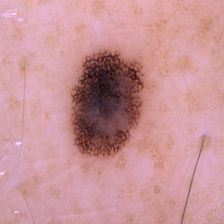

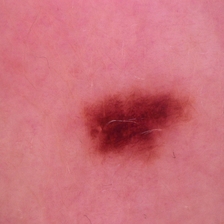

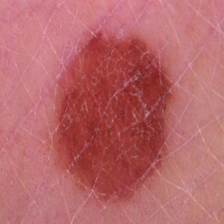

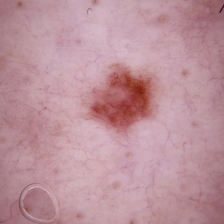

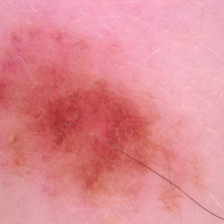

In [20]:
import os

benign_train = "skin_cancer_dataset/train/benign"
valid_images = [f for f in os.listdir(benign_train) if f.endswith(('.png', '.jpg', '.jpeg'))]
for i in valid_images[:5]:
    display(_Imgdis(filename=os.path.join(benign_train, i), width=150))



In [5]:
from keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [22]:
vgg = VGG16(input_shape=Image_Size + [3], weights='imagenet',include_top=False)
vgg.input


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 89s 2us/step


<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor>

In [25]:
from glob import glob
image_paths = glob('skin_cancer_dataset/train/*/*')
print(f"Total images found: {len(image_paths)}")



Total images found: 2637


In [26]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation="softmax")(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()






Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          25,089 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 14,739,777 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
train_datagen=ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [29]:
test_datagen=ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [38]:
train_path="skin_cancer_dataset/train"
test_path="skin_cancer_dataset/test"

In [39]:
train_set=train_datagen.flow_from_directory(train_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='binary'
                                           )

Found 2638 images belonging to 2 classes.


In [40]:
test_set=train_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='binary'
                                          )

Found 660 images belonging to 2 classes.


In [43]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='mymodel.keras', verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history = model.fit(
    train_set, 
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=32,
    callbacks=callbacks,
    verbose=2
)

duration = datetime.now() - start
print("Total time taken:", duration)


NameError: name 'steps_per_epoch' is not defined